In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
614,8.05,41.0,0
166,7.76,59.0,0
349,8.12,16.0,0
474,7.11,25.0,1
212,6.23,57.0,0


C:\Users\HP\AppData\Local\Temp\ipykernel_7324\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\HP\AppData\Local\Temp\ipykernel_7324\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


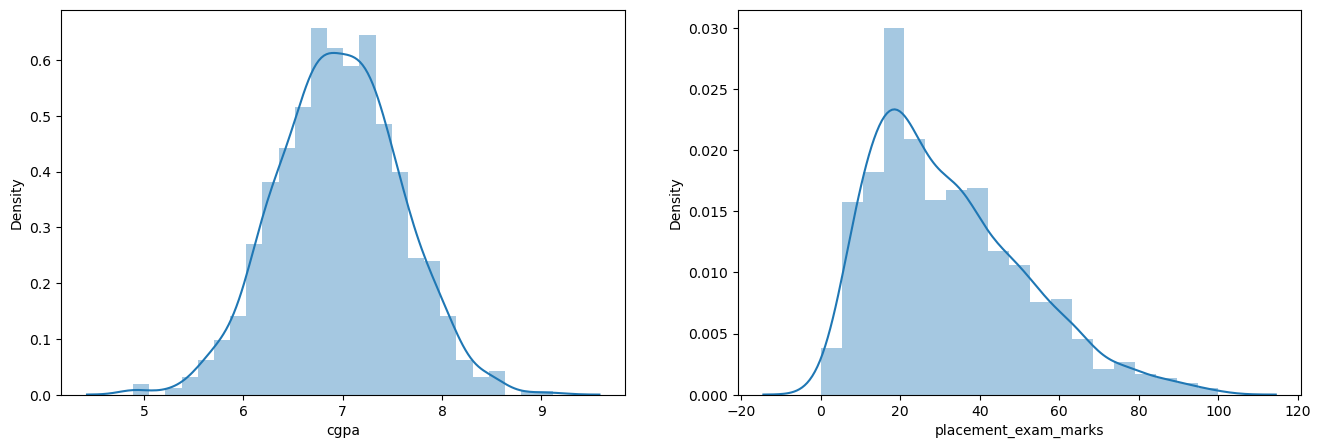

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [11]:
df['placement_exam_marks'].describe()


count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

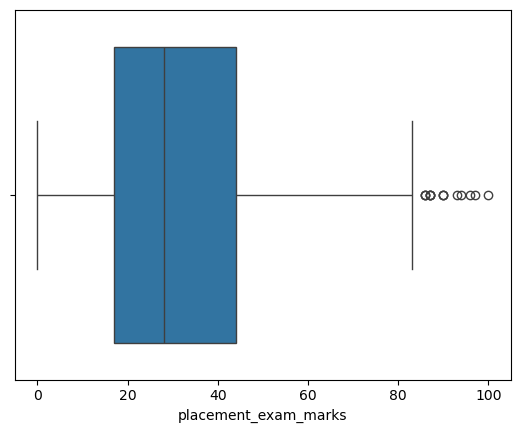

In [29]:
sns.boxplot(x=df['placement_exam_marks'])

In [31]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [35]:
percentile75

44.0

In [37]:
iqr = percentile75 -  percentile25

In [39]:
iqr

27.0

In [41]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [43]:
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)


Upper limit 84.5
Lower limit -23.5


# Finding Outliers

In [46]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [50]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [55]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [59]:
new_df.shape

(985, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_7324\308690580.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP\AppData\Local\Temp\ipykernel_7324\308690580.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


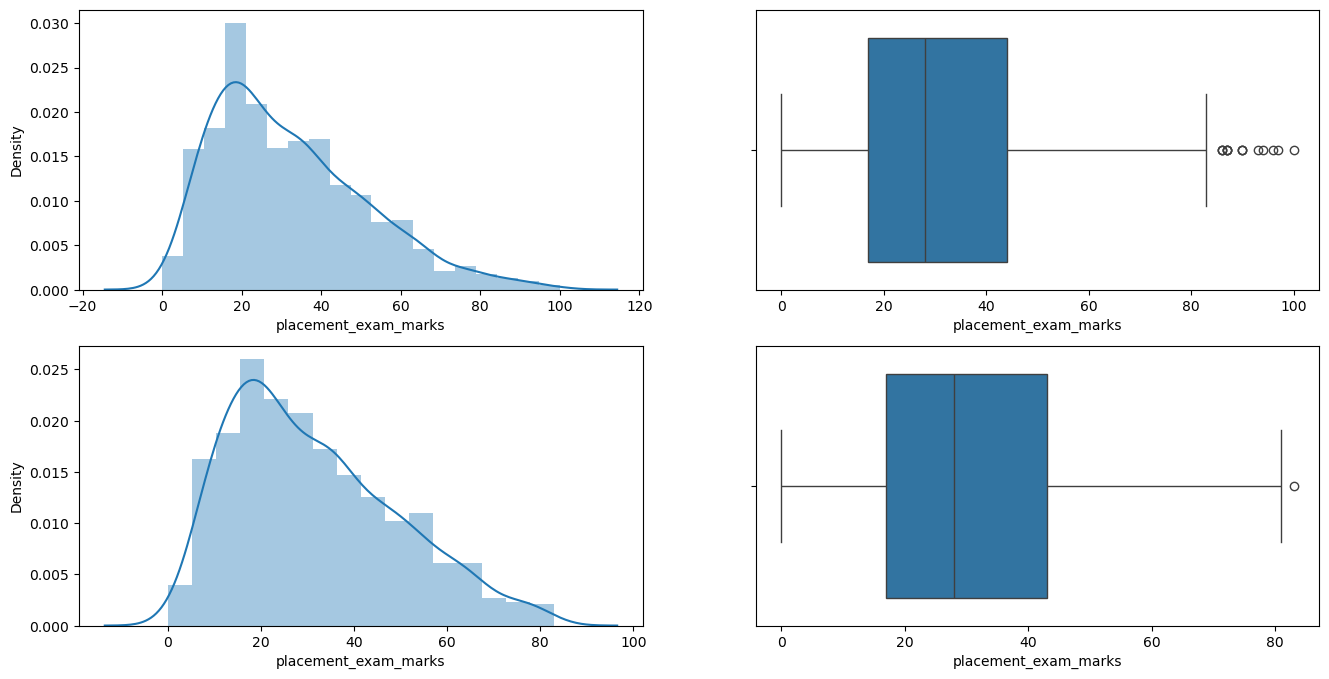

In [69]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()

# Capping

In [74]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [84]:
# np.where(condtion,true,false)

In [80]:
new_df_cap.shape

(1000, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_7324\359754614.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP\AppData\Local\Temp\ipykernel_7324\359754614.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


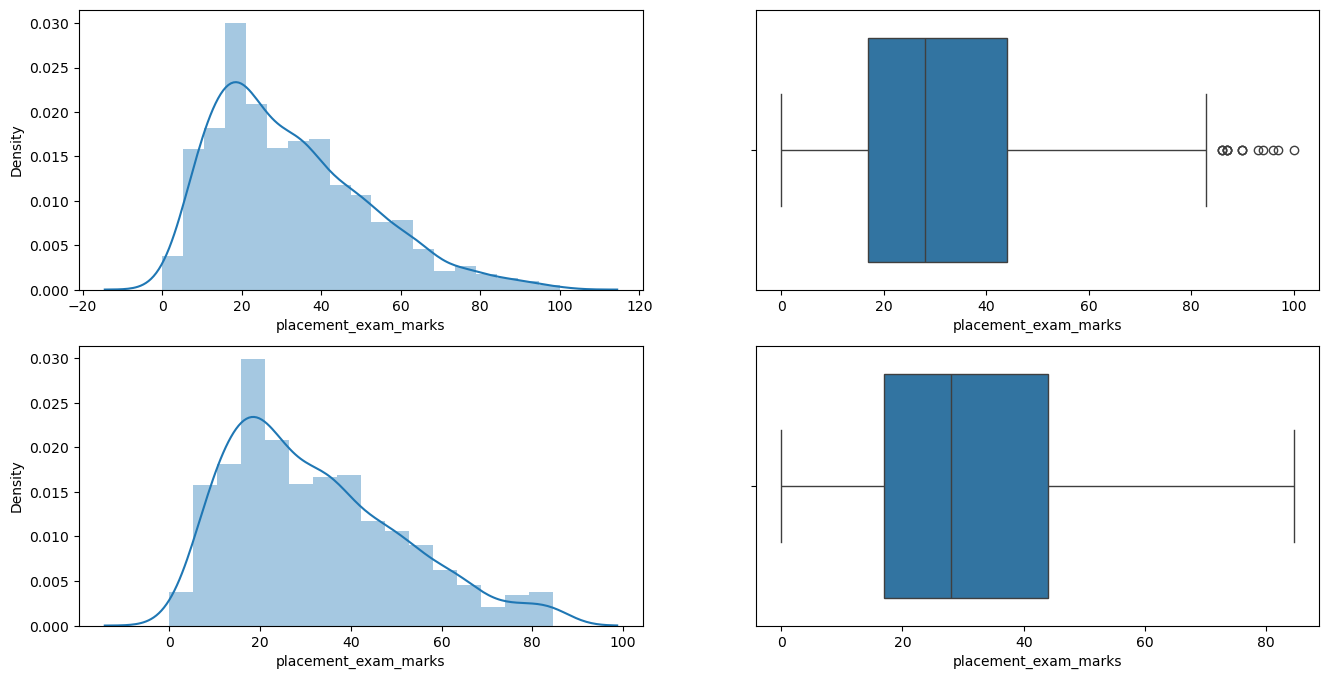

In [91]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.show()
